In [2]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 28.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=bbe978eb88875fb0ad6e044e330ef79f6ddccb0a5a7c7a3037ceccbfe7d9ac18
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=3129098a88ec90d7450f0e33b4e2a1f31273fbd0041c19f809bf2d90981cc6d0
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [3]:
# Import the package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from umap import UMAP

In [4]:
# Import the data
UserInformation = pd.read_csv("users.dat", sep="::", header=None, engine='python')
UserInformation = UserInformation.rename(columns={0:'UserID', 1:'Gender', 2:'Age', 3:'Occupation', 4:'zip'})
ItemInformation = pd.read_csv("movies.dat", sep="::", header=None, engine='python', encoding = 'ISO-8859-1')
ItemInformation = ItemInformation.rename(columns={0:'ItemID', 1:'Title', 2:'Genre'})
user = np.load('User.npy')
item = np.load('Item.npy')

In [5]:
# Preprocess the title and genre of movie
Item_name_year=ItemInformation['Title'].str.extract('(.*)\((\d{4})\)', expand=False)
Item_name_year = Item_name_year.rename(columns={0:'Name', 1:'Year'})
Item_name_year
ItemInformation['Name'] = Item_name_year['Name']
ItemInformation['Year'] = Item_name_year['Year']
ItemInformation=ItemInformation.drop('Title', axis=1)
ItemInformation['Year'] = (ItemInformation.Year.astype('int') // 10) * 10
ItemInformation
ItemInformation

ItemInformation['Genre']=ItemInformation.Genre.str.split('|').str.get(0)
ItemInformation

,ItemID,Genre,Name,Year
0,1,Animation,Toy Story,1990
1,2,Adventure,Jumanji,1990
2,3,Comedy,Grumpier Old Men,1990
3,4,Comedy,Waiting to Exhale,1990
4,5,Comedy,Father of the Bride Part II,1990
...,...,...,...,...
3878,3948,Comedy,Meet the Parents,2000
3879,3949,Drama,Requiem for a Dream,2000
3880,3950,Drama,Tigerland,2000
3881,3951,Drama,Two Family House,2000


In [6]:
# Delete the extra information from ratting
a=list(ItemInformation.ItemID)
c=np.arange(3952)
d = [y for y in c if y not in a]
del d[0]

i = list(np.array(d) - 1)
item_new=item.T
item_new = np.delete(item_new, i, axis = 0)

print(item_new.shape)
print(ItemInformation.shape)

(3883, 10)
(3883, 4)


In [7]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
user = StandardScaler().fit_transform(user)
item_new = StandardScaler().fit_transform(item_new)

In [8]:
# PCA
pca = PCA(n_components = 2)
item_pca = pca.fit_transform(item_new)
item_pca_result = pd.DataFrame({'component1':item_pca[:,0],'component2':item_pca[:,1]})

# t-SNE
tsne = TSNE(n_components = 2)
item_tsne = tsne.fit_transform(item_new)
item_tsne_result = pd.DataFrame({'component1':item_tsne[:,0],'component2':item_tsne[:,1]})

# UMAP
umap = UMAP(n_components = 2)
item_umap = umap.fit_transform(item_new)
item_umap_result = pd.DataFrame({'component1':item_umap[:,0],'component2':item_umap[:,1]})

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [9]:
# The information left for movie after PCA
pca = PCA(n_components = 2)
item_pca = pca.fit_transform(item_new)
pca.explained_variance_ratio_ 
ratio=pca.explained_variance_ratio_ 
ratio.sum()

0.25217931465111115

<function matplotlib.pyplot.show(*args, **kw)>

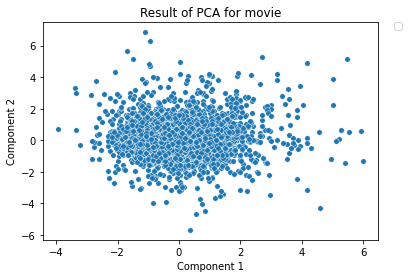

In [12]:
# Result of PCA for movie
sns.scatterplot(x='component1', y='component2', data=item_pca_result, legend='full', s=30)
plt.title('Result of PCA for movie')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

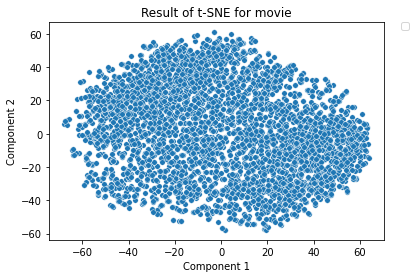

In [13]:
# Result of t-SNE for movie
sns.scatterplot(x='component1', y='component2', data=item_tsne_result, legend='full', s=30)
plt.title('Result of t-SNE for movie')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

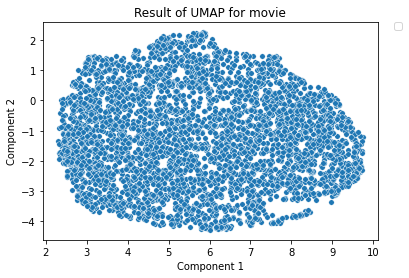

In [14]:
# Result of UMAP for movie
sns.scatterplot(x='component1', y='component2', data=item_umap_result, legend='full', s=30)
plt.title('Result of UMAP for movie')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show

In [15]:
# PCA
pca = PCA(n_components = 2)
user_pca = pca.fit_transform(user)
user_pca_result = pd.DataFrame({'component1':user_pca[:,0],'component2':user_pca[:,1]})

# t-SNE
tsne = TSNE(n_components = 2)
user_tsne = tsne.fit_transform(user)
user_tsne_result = pd.DataFrame({'component1':user_tsne[:,0],'component2':user_tsne[:,1]})

# UMAP
umap = UMAP(n_components = 2)
user_umap = umap.fit_transform(user)
user_umap_result = pd.DataFrame({'component1':user_umap[:,0],'component2':user_umap[:,1]})

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [16]:
# Information left after PCA for user
pca = PCA(n_components = 2)
user_pca = pca.fit_transform(user)
pca.explained_variance_ratio_ 
ration=pca.explained_variance_ratio_ 
ration.sum()

0.29847413437610065

<function matplotlib.pyplot.show(*args, **kw)>

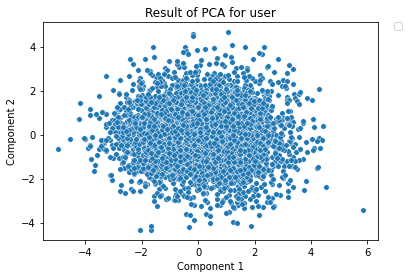

In [17]:
# Result of PCA for user
sns.scatterplot(x='component1', y='component2', data=user_pca_result, legend='full', s=30)
plt.title('Result of PCA for user')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

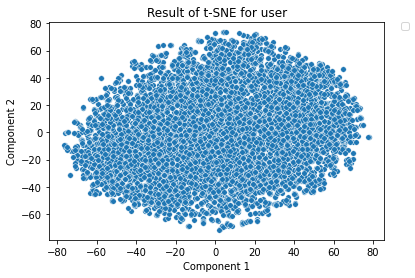

In [18]:
# Result of t-SNE for user
sns.scatterplot(x='component1', y='component2', data=user_tsne_result, legend='full', s=30)
plt.title('Result of t-SNE for user')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

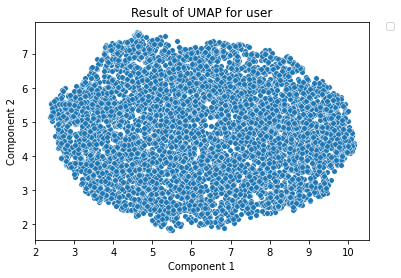

In [19]:
# Result of UMAP for user
sns.scatterplot(x='component1', y='component2', data=user_umap_result, legend='full', s=30)
plt.title('Result of UMAP for user')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show

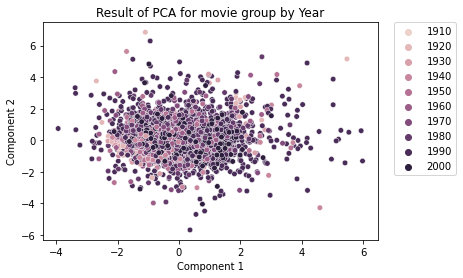

In [25]:
#Result of PCA for movie group by Year
item_pca_year = pd.DataFrame({'component1': item_pca[:, 0], 'component2': item_pca[:, 1], 'label': ItemInformation.Year})
color_dict =  sns.color_palette('tab10', 10)
sns.scatterplot(x='component1', y='component2', hue='label', data=item_pca_year, legend='full',s=30)
plt.title('Result of PCA for movie group by Year')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

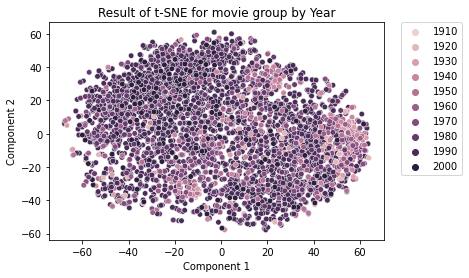

In [27]:
#Result of t-SNE for movie group by Year
item_tsne_year = pd.DataFrame({'component1': item_tsne[:, 0], 'component2': item_tsne[:, 1], 'label': ItemInformation.Year})
color_dict =  sns.color_palette('tab10', 10)
sns.scatterplot(x='component1', y='component2', hue='label', data=item_tsne_year, legend='full',s=30)
plt.title('Result of t-SNE for movie group by Year')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

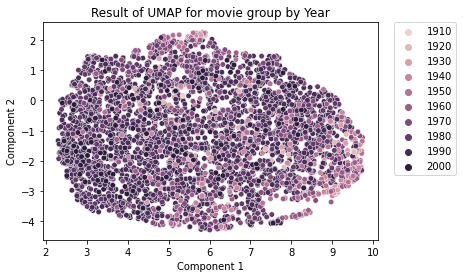

In [20]:
#Result of UMAP for movie group by Year
item_umap_year = pd.DataFrame({'component1': item_umap[:, 0], 'component2': item_umap[:, 1], 'label': ItemInformation.Year})
color_dict =  sns.color_palette('tab10', 10)
sns.scatterplot(x='component1', y='component2', hue='label', data=item_umap_year, legend='full',s=30)
plt.title('Result of UMAP for movie group by Year')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

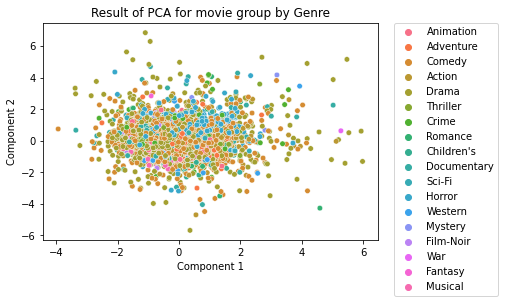

In [28]:
# Result of PCA for movie group by Genre
item_pca_genre = pd.DataFrame({'component1': item_pca[:, 0], 'component2': item_pca[:, 1], 'label': ItemInformation.Genre})
color_dict =  sns.color_palette('tab10', 18)
sns.scatterplot(x='component1', y='component2', hue='label', data=item_pca_genre, legend='full',s=30)
plt.title('Result of PCA for movie group by Genre')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

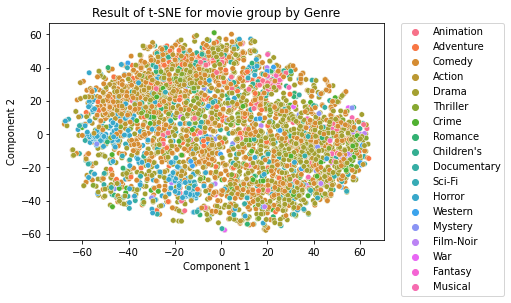

In [29]:
# Result of t-SNE for movie group by Genre
item_tsne_genre = pd.DataFrame({'component1': item_tsne[:, 0], 'component2': item_tsne[:, 1], 'label': ItemInformation.Genre})
color_dict =  sns.color_palette('tab10', 18)
sns.scatterplot(x='component1', y='component2', hue='label', data=item_tsne_genre, legend='full',s=30)
plt.title('Result of t-SNE for movie group by Genre')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

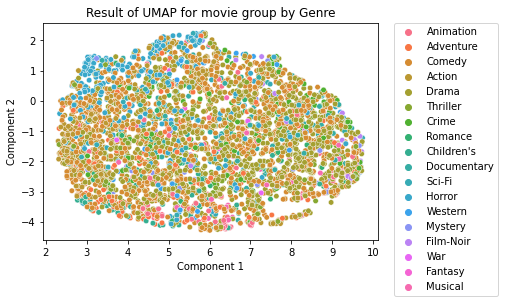

In [34]:
# Result of UMAP for movie group by Genre
item_umap_genre = pd.DataFrame({'component1': item_umap[:, 0], 'component2': item_umap[:, 1], 'label': ItemInformation.Genre})
color_dict =  sns.color_palette('tab10', 18)
sns.scatterplot(x='component1', y='component2', hue='label', data=item_umap_genre, legend='full',s=30)
plt.title('Result of UMAP for movie group by Genre')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

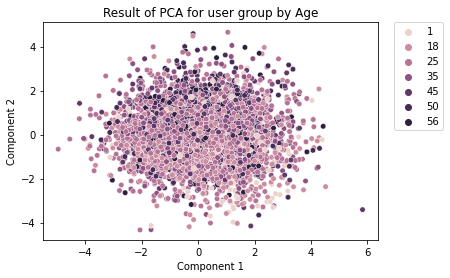

In [35]:
# Result of PCA for user group by Age
user_pca_age = pd.DataFrame({'component1': user_pca[:, 0], 'component2': user_pca[:, 1], 'label': UserInformation.Age})
color_dict =  sns.color_palette('tab10', 7)
sns.scatterplot(x='component1', y='component2', hue='label', data=user_pca_age, legend='full',s=30)
plt.title('Result of PCA for user group by Age')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

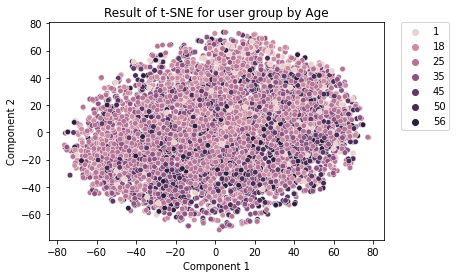

In [36]:
# Result of UMAP for user group by Age
user_tsne_age = pd.DataFrame({'component1': user_tsne[:, 0], 'component2': user_tsne[:, 1], 'label': UserInformation.Age})
color_dict =  sns.color_palette('tab10', 7)
sns.scatterplot(x='component1', y='component2', hue='label', data=user_tsne_age, legend='full',s=30)
plt.title('Result of t-SNE for user group by Age')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

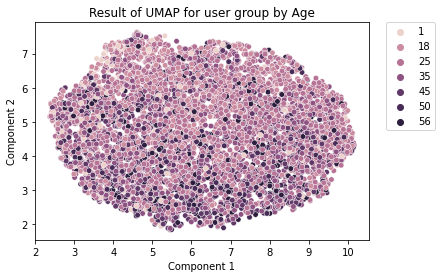

In [37]:
# Result of UMAP for user group by Age
user_umap_age = pd.DataFrame({'component1': user_umap[:, 0], 'component2': user_umap[:, 1], 'label': UserInformation.Age})
color_dict =  sns.color_palette('tab10', 7)
sns.scatterplot(x='component1', y='component2', hue='label', data=user_umap_age, legend='full',s=30)
plt.title('Result of UMAP for user group by Age')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

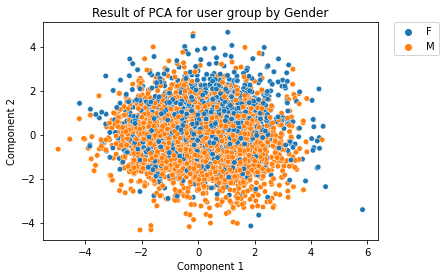

In [31]:
# Result of PCA for user group by Gender
user_pca_gender = pd.DataFrame({'component1': user_pca[:, 0], 'component2': user_pca[:, 1], 'label': UserInformation.Gender})
color_dict =  sns.color_palette('tab10', 2)
sns.scatterplot(x='component1', y='component2', hue='label', data=user_pca_gender, legend='full',s=30)
plt.title('Result of PCA for user group by Gender')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

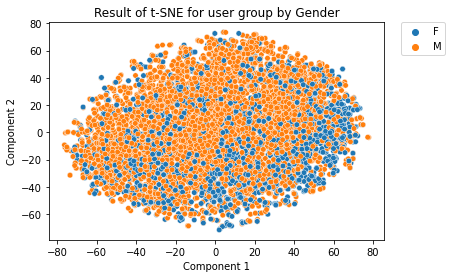

In [32]:
# Result of t-SNE for user group by Gender
user_tsne_gender = pd.DataFrame({'component1': user_tsne[:, 0], 'component2': user_tsne[:, 1], 'label': UserInformation.Gender})
color_dict =  sns.color_palette('tab10', 2)
sns.scatterplot(x='component1', y='component2', hue='label', data=user_tsne_gender, legend='full',s=30)
plt.title('Result of t-SNE for user group by Gender')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

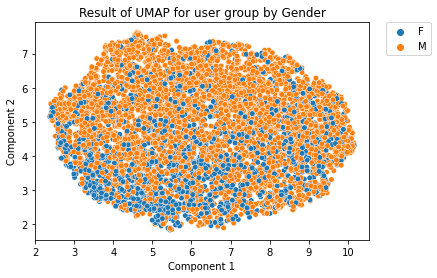

In [33]:
# Result of UMAP for user group by Gender
user_umap_gender = pd.DataFrame({'component1': user_umap[:, 0], 'component2': user_umap[:, 1], 'label': UserInformation.Gender})
color_dict =  sns.color_palette('tab10', 2)
sns.scatterplot(x='component1', y='component2', hue='label', data=user_umap_gender, legend='full',s=30)
plt.title('Result of UMAP for user group by Gender')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

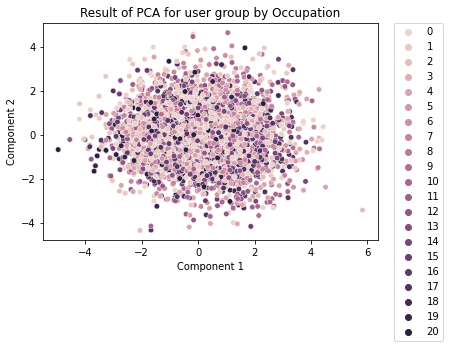

In [38]:
# Result of PCA for user group by Occupation
user_pca_occupation = pd.DataFrame({'component1': user_pca[:, 0], 'component2': user_pca[:, 1], 'label': UserInformation.Occupation})
color_dict =  sns.color_palette('tab10', 21)
sns.scatterplot(x='component1', y='component2', hue='label', data=user_pca_occupation, legend='full',s=30)
plt.title('Result of PCA for user group by Occupation')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

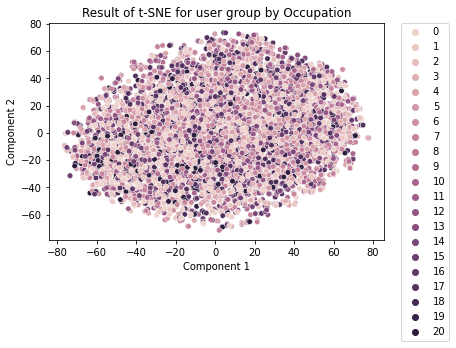

In [39]:
# Result of t-SNE for user group by Occupation
user_tsne_occupation = pd.DataFrame({'component1': user_tsne[:, 0], 'component2': user_tsne[:, 1], 'label': UserInformation.Occupation})
color_dict =  sns.color_palette('tab10', 21)
sns.scatterplot(x='component1', y='component2', hue='label', data=user_tsne_occupation, legend='full',s=30)
plt.title('Result of t-SNE for user group by Occupation')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

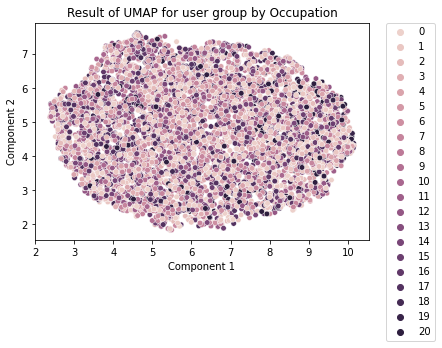

In [24]:
# Result of UMAP for user group by Occupation
user_umap_occupation = pd.DataFrame({'component1': user_umap[:, 0], 'component2': user_umap[:, 1], 'label': UserInformation.Occupation})
color_dict =  sns.color_palette('tab10', 21)
sns.scatterplot(x='component1', y='component2', hue='label', data=user_umap_occupation, legend='full',s=30)
plt.title('Result of UMAP for user group by Occupation')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)